In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Opening the CSV files
test = pd.read_csv('test_data.csv',encoding='cp1252')
training = pd.read_csv('training_data.csv',encoding='cp1252')

In [3]:
# We ca have two methods: filling the cloudiness row (FILLING_CLOUDINESS), or removing it (REMOVING_CLOUDINESS)
method = 'FILLING_CLOUDINESS'
#method = 'REMOVING_CLOUDINESS'

In [4]:
# Checking the collumns names
training.keys()

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

In [5]:
# Dataset Head
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [6]:
# Dataset Info
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [7]:
# Dataset Description
training.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


In [8]:
# Chaging record-date to DateTime
training.record_date = pd.to_datetime(training.record_date)
test.record_date = pd.to_datetime(test.record_date)

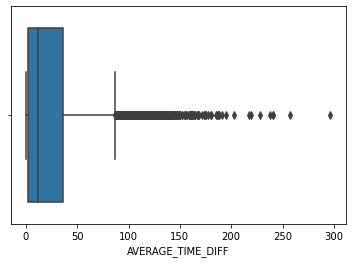

In [9]:
# Checking it there is outliers
ax1 = sns.boxplot(x=training['AVERAGE_TIME_DIFF'])

In [10]:
# Removing the outliers
training = training.loc[training['AVERAGE_TIME_DIFF']<=200]

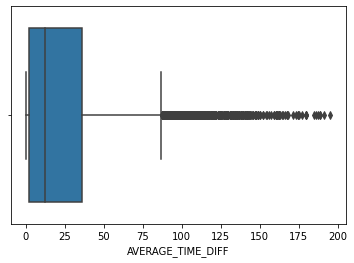

In [11]:
# Checking it the outliers
ax1 = sns.boxplot(x=training['AVERAGE_TIME_DIFF'])

In [12]:
# Checking LUMINOSITY qualitative classifiers
training['LUMINOSITY'].unique()

array(['LIGHT', 'LOW_LIGHT', 'DARK'], dtype=object)

In [13]:
# Checking AVERAGE_CLOUDINESS qualitative classifiers
training['AVERAGE_CLOUDINESS'].unique()

array([nan, 'céu claro', 'nuvens dispersas', 'céu pouco nublado',
       'céu limpo', 'algumas nuvens', 'nuvens quebrados', 'tempo nublado',
       'nuvens quebradas', 'nublado'], dtype=object)

In [14]:
# Checking AVERAGE_CLOUDINESS qualitative classifiers
test['AVERAGE_CLOUDINESS'].unique()

array(['céu claro', 'nuvens dispersas', nan, 'céu pouco nublado',
       'nuvens quebradas', 'algumas nuvens', 'nuvens quebrados',
       'nublado', 'céu limpo', 'tempo nublado'], dtype=object)

In [15]:
# Changing qualitative classifiers to quantitative classifiers

training_luminosity_qt = {'LIGHT': 1, 'LOW_LIGHT': 2, 'DARK': 3}
training_cloudiness_qt = {'céu claro': 1, 'nuvens dispersas': 2, 'céu pouco nublado': 3, 'céu limpo': 4, 'algumas nuvens': 5, 'nuvens quebrados': 6, 'tempo nublado': 7, 'nuvens quebradas': 8, 'nublado': 9}
training_speed_diff_qt = {'None': 1, 'Medium': 2, 'Low': 3, 'High': 4, 'Very_High': 5}

training.replace(training_luminosity_qt, inplace = True)
training.replace(training_cloudiness_qt, inplace = True)
training.replace(training_speed_diff_qt, inplace = True)

test.replace(training_luminosity_qt, inplace = True)
test.replace(training_cloudiness_qt, inplace = True)
if method == 'FILLING_CLOUDINESS':
    test['AVERAGE_CLOUDINESS'] = test['AVERAGE_CLOUDINESS'].fillna(0)

In [16]:
# Seeing if there is any missing values
training.isna().any()

city_name                  False
record_date                False
AVERAGE_SPEED_DIFF         False
AVERAGE_FREE_FLOW_SPEED    False
AVERAGE_TIME_DIFF          False
AVERAGE_FREE_FLOW_TIME     False
LUMINOSITY                 False
AVERAGE_TEMPERATURE        False
AVERAGE_ATMOSP_PRESSURE    False
AVERAGE_HUMIDITY           False
AVERAGE_WIND_SPEED         False
AVERAGE_CLOUDINESS          True
AVERAGE_PRECIPITATION      False
AVERAGE_RAIN                True
dtype: bool

In [17]:
# Seeing how many missing values are in each collumn
print(training.isna().sum())

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2680
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6240
dtype: int64


<AxesSubplot:>

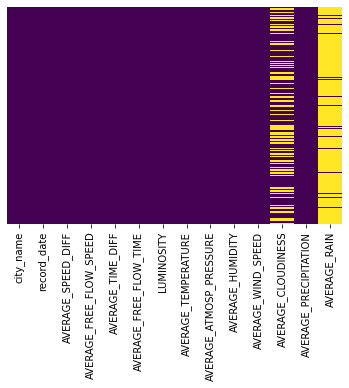

In [18]:
# Checking the heatmap
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
# Because there are a almost no data if AVERAGE_RAIN, we will drop this collumn
training = training.drop(['AVERAGE_RAIN'], axis=1)
test = test.drop(['AVERAGE_RAIN'], axis=1)

In [20]:
# Now we are filling the missing Data via interpolation
if method == 'FILLING_CLOUDINESS':
    training['AVERAGE_CLOUDINESS'] = training['AVERAGE_CLOUDINESS'].fillna(method='bfill')
    training['AVERAGE_CLOUDINESS'] = training['AVERAGE_CLOUDINESS'].interpolate(method='linear',limit_direction='forward')

In [21]:
# Removing the Cloundiness if we want too
if method == 'REMOVING_CLOUDINESS':
    training.drop(['AVERAGE_CLOUDINESS'], axis=1, inplace=True)
    test.drop(['AVERAGE_CLOUDINESS'], axis=1, inplace=True)

<AxesSubplot:>

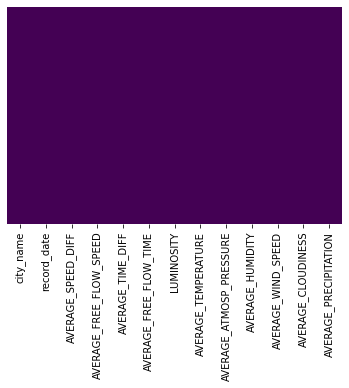

In [22]:
# Checking the heatmap again so we can see that no value is missing now
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
# Now it's time to drop the rows that are duplicated 
training = training.drop_duplicates(subset=('city_name','record_date'), keep='first')

In [24]:
# Finnaly we will remove the rows where the values are all the same
for name in training.keys():
    listaDados = training[name]
    element = listaDados[0]
    chk     = True
    for item in listaDados:
        if element != item:
            chk = False
            break;
    if chk:
        training = training.drop([name], axis=1)
        test = test.drop([name], axis=1)

<AxesSubplot:>

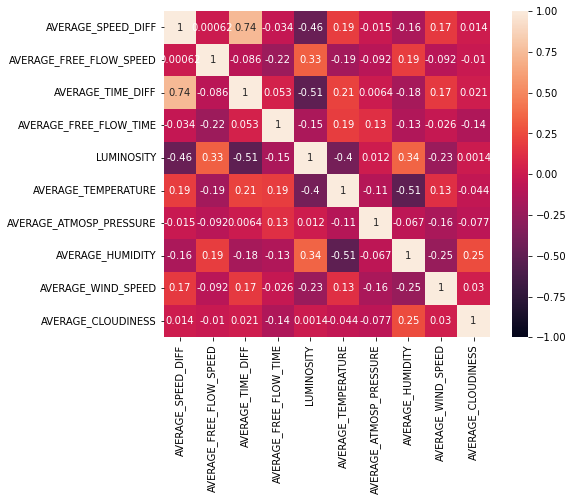

In [25]:
# Matriz de coorelação
corr_matrix = training.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [26]:
# Vizualize how the training Dataset is at the moment
training.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,2019-08-29 07:00:00,2,41.5,11.5,71.4,1,15.0,1019.0,100.0,3.0,1.0
1,2018-08-10 14:00:00,4,41.7,48.3,87.4,1,21.0,1021.0,53.0,5.0,1.0
2,2019-09-01 16:00:00,4,38.6,38.4,85.2,1,26.0,1014.0,61.0,4.0,1.0
3,2019-02-26 11:00:00,4,37.4,61.0,94.1,1,18.0,1025.0,48.0,4.0,1.0
4,2019-06-06 12:00:00,2,41.6,50.4,77.0,1,15.0,1008.0,82.0,10.0,2.0


In [27]:
# Starting to prepare the Predicitions
X = training.drop(['AVERAGE_SPEED_DIFF', 'record_date'], axis=1)
y = training['AVERAGE_SPEED_DIFF']

test.drop(['record_date'], axis=1, inplace=True)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2021)

<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='count'>

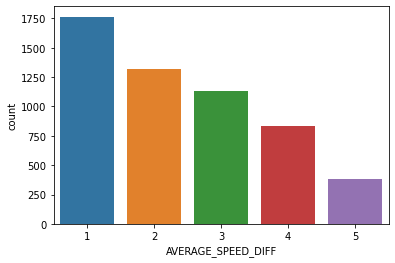

In [29]:
# Checking the values in y_train
sns.countplot(x = y_train, order = training['AVERAGE_SPEED_DIFF'].value_counts().index)

<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='count'>

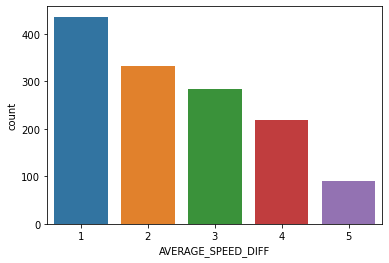

In [30]:
# Checking if the values in y_test look like the ones in y_train 
sns.countplot(x = y_test, order = training['AVERAGE_SPEED_DIFF'].value_counts().index)

In [31]:
# Using the Decision Tree Classifier Regression method

from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)

predictions = treemodel.predict(X_test)
predictions

array([3, 1, 2, ..., 5, 3, 2], dtype=int64)

              precision    recall  f1-score   support

           1       0.85      0.84      0.84       436
           2       0.67      0.66      0.66       332
           3       0.60      0.61      0.61       283
           4       0.61      0.61      0.61       219
           5       0.77      0.78      0.78        91

    accuracy                           0.71      1361
   macro avg       0.70      0.70      0.70      1361
weighted avg       0.71      0.71      0.71      1361

You have got  0.71 accuracy  in this prediction


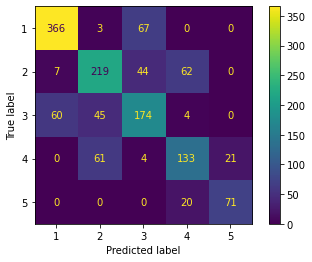

In [32]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=treemodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=treemodel.classes_)
disp.plot()

In [33]:
# Using the Linear Regression method

from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

predictions = linearmodel.predict(X_test)
predictions

array([2.1276208 , 1.77726151, 2.64990054, ..., 4.79748864, 1.7752795 ,
       1.94901606])

You have got  0.56 accuracy  in this prediction


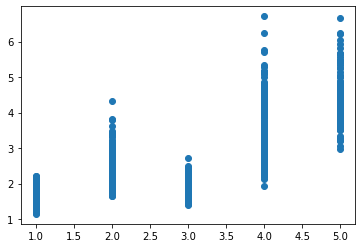

In [34]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score

# Printing the results

print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % r2_score(y_test, predictions))

plt.scatter(y_test, predictions)

In [35]:
# Using the Logistic Regression method

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
predictions

array([3, 1, 2, ..., 5, 3, 3], dtype=int64)

              precision    recall  f1-score   support

           1       0.86      0.92      0.89       436
           2       0.76      0.78      0.77       332
           3       0.71      0.67      0.69       283
           4       0.75      0.67      0.71       219
           5       0.79      0.75      0.77        91

    accuracy                           0.78      1361
   macro avg       0.77      0.76      0.77      1361
weighted avg       0.78      0.78      0.78      1361

You have got  0.78 accuracy  in this prediction


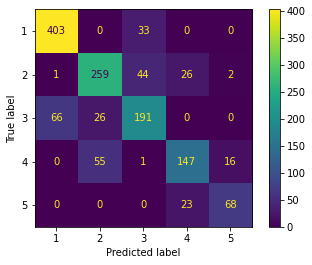

In [36]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

#77540 RemCloudiness 0.35
#78050 RemCloudiness 0.30
#78366 RemCloudiness 0.25
#78398 RemCloudiness 0.20

#77372 FilCloudiness 0.35
#78099 FilCloudiness 0.30
#77954 FilCloudiness 0.25
#78472 FilCloudiness 0.20

#78398 RemCloudiness 0.20 <=200
#77002 RemCloudiness 0.20 <=210

#78472 FilCloudiness 0.20 <=200
#77149 FilCloudiness 0.20 <=210

#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=logmodel.classes_)
disp.plot()

In [37]:
# Using the Logistic Regression method

from sklearn.svm import SVC

svcmodel = SVC()
svcmodel.fit(X_train,y_train)

predictions = svcmodel.predict(X_test)
predictions

array([1, 1, 2, ..., 4, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           1       0.56      1.00      0.71       436
           2       0.62      0.73      0.67       332
           3       0.00      0.00      0.00       283
           4       0.54      0.47      0.50       219
           5       1.00      0.01      0.02        91

    accuracy                           0.57      1361
   macro avg       0.54      0.44      0.38      1361
weighted avg       0.48      0.57      0.47      1361

You have got  0.57 accuracy  in this prediction


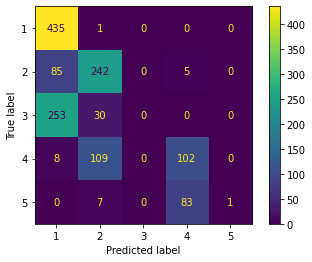

In [38]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions, zero_division=0))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=svcmodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=svcmodel.classes_)
disp.plot()

In [39]:
# Using the GridSeacrh method

from sklearn.model_selection import GridSearchCV

#79353
#param_grid = {'C':[500, 625, 750, 875, 1000], 'gamma':[0.001,0.0005,0.0001,0.00005,0.00001], 'kernel':['rbf']}

#79574 FilCloudinesss 0.20
#79427 RemCloudinesss 0.20

param_grid = {'C':[500, 750, 1000, 1250, 1500], 'gamma':[0.001,0.0005,0.0001,0.00005,0.00001], 'kernel':['rbf']}

#79427
#param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[0.001,0.0005,0.0001,0.00005,0.00001], 'kernel':['rbf']}

#79280
#param_grid = {'C':[10, 500, 1000, 2000, 5000], 'gamma':[0.01, 0.005, 0.0001, 0.00005, 0.00001], 'kernel':['rbf']}

grid = GridSearchCV( SVC(random_state=2021), param_grid, refit=True, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....C=500, gamma=0.001, kernel=rbf;, score=0.763 total time=   1.5s
[CV 2/5] END ....C=500, gamma=0.001, kernel=rbf;, score=0.753 total time=   1.5s
[CV 3/5] END ....C=500, gamma=0.001, kernel=rbf;, score=0.755 total time=   1.5s
[CV 4/5] END ....C=500, gamma=0.001, kernel=rbf;, score=0.723 total time=   1.5s
[CV 5/5] END ....C=500, gamma=0.001, kernel=rbf;, score=0.735 total time=   1.4s
[CV 1/5] END ...C=500, gamma=0.0005, kernel=rbf;, score=0.780 total time=   1.2s
[CV 2/5] END ...C=500, gamma=0.0005, kernel=rbf;, score=0.769 total time=   1.2s
[CV 3/5] END ...C=500, gamma=0.0005, kernel=rbf;, score=0.770 total time=   1.2s
[CV 4/5] END ...C=500, gamma=0.0005, kernel=rbf;, score=0.736 total time=   1.1s
[CV 5/5] END ...C=500, gamma=0.0005, kernel=rbf;, score=0.763 total time=   1.1s
[CV 1/5] END ...C=500, gamma=0.0001, kernel=rbf;, score=0.787 total time=   0.7s
[CV 2/5] END ...C=500, gamma=0.0001, kernel=rbf

GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [500, 750, 1000, 1250, 1500],
                         'gamma': [0.001, 0.0005, 0.0001, 5e-05, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [40]:
grid.best_params_

{'C': 750, 'gamma': 0.0001, 'kernel': 'rbf'}

In [41]:
grid.best_estimator_

SVC(C=750, gamma=0.0001, random_state=2021)

In [42]:
predictions = grid.predict(X_test)

              precision    recall  f1-score   support

           1       0.88      0.92      0.90       436
           2       0.79      0.75      0.77       332
           3       0.70      0.71      0.71       283
           4       0.75      0.73      0.74       219
           5       0.81      0.80      0.81        91

    accuracy                           0.80      1361
   macro avg       0.79      0.78      0.78      1361
weighted avg       0.79      0.80      0.79      1361

You have got  0.80 accuracy  in this prediction


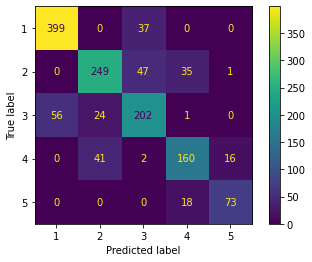

In [48]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

cm = confusion_matrix(y_test, predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()

In [44]:
data = { 'RowId' : [i for i in range(1,1501)], 'Speed_Diff' : np.array(grid.predict(test)).tolist() }

In [45]:
predict_DataFrame = pd.DataFrame(data)

data_speed_diff_qt = {1: 'None', 2: 'Medium', 3: 'Low', 4: 'High', 5: 'Very_High'}
predict_DataFrame['Speed_Diff'].replace(data_speed_diff_qt, inplace = True)

predict_DataFrame

,RowId,Speed_Diff
0,1,None
1,2,Low
2,3,None
3,4,High
4,5,Low
...,...,...
1495,1496,None
1496,1497,None
1497,1498,None
1498,1499,Very_High


In [46]:
predict_DataFrame.to_csv('Resultados/submit7.csv',index=False)

In [47]:
# Retirar outliers de alguns que possam tar a mais
# Retirar coluna do PRECPITATION
# Ver os 3 modelos, SVC, Tree, e Regression
# sns countplot

# Acrescentar a string Nan para mudar as cenas na cloudiness